Formation OpenClassrooms DS-IML

**Projet 3**

Par **Marc Lefèvre**, <marc.lefevre@noos.fr>

# **SEATTLE ENERGY BENCHMARKING**

A partir de deux datasets contenant des informations relatives à des bêtiments (ou groupe de bâtiments) de la ville de **Seattle** et de leur consomation énergétique, le but de ce projet est triple :<br>- **Modéliser** dans un premier temps cette **consommation électrique**<br>- **Modéliser** ensuite leurs **dégagements de gaz à effet de serre**<br>- Enfin, discuter la pertinence d'un indicateur d'efficacité énergétique appelé **Energy Star Score**.

### Préliminaires

Chargement des bibliothèques Python que nous allons utiliser et récupération des données. 

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from marko import table_cor, anova_g, test_chi2_g
import scipy.stats as st
import pickle

# Modification du nombre maximum de colonnes affichables
pd.options.display.max_columns = 60

Les données sont téléchargeables à ces adresses :

In [ ]:
ddddd

In [2]:
df_2015 = pd.read_csv("2015-building-energy-benchmarking.csv")
df_2016 = pd.read_csv("2016-building-energy-benchmarking.csv")

# 1- Regroupement des données

Comme nous l'avons dit, nos données proviennent de deux sources, deux fichiers contenant informations et relevés énergétiques divers, l'un pour **l'année 2015** et l'autre pour **l'année 2016**.<br>Notre première tâche est de regrouper ces données en un **unique dataset**.

Observons une première fois nos dataframes.

In [3]:
df_2015.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081


In [4]:
df_2016.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.0,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.0,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.0,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19


Ils semblent très similaires, mais pas totalement.<br>Affichons les colonnes de **df_2015** **absentes** de **df_2016**.

In [5]:
# Colonnes présentes uniquement dans df_2015
df_2015.columns.difference(df_2016.columns)

Index(['2010 Census Tracts', 'City Council Districts', 'Comment',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'Location', 'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'Zip Codes'],
      dtype='object')

Et celles de **df_2016** absentes de **df_2015**.

In [6]:
# Colonnes uniquement présentes dans df_2016
df_2016.columns.difference(df_2015.columns)

Index(['Address', 'City', 'Comments', 'GHGEmissionsIntensity', 'Latitude',
       'Longitude', 'State', 'TotalGHGEmissions', 'ZipCode'],
      dtype='object')

Après observation détaillée, nous avons que :<br>- df_2015 disposent de variables "en plus" de df_2016 (comme "2010  Census Tracts", "City Council Districts"...)<br>- Certaines colonnes apparement différentes sont les mêmes mais avec juste des noms différents ("Comments" / "Comment", et les variables en "GHGEmmissions(...)"). Il suffit de les **renommer**.<br>- Les variables "Adress", "City", "Latitude", "Longitude", "State", "ZipCode" de df_2016 reprennent les informations présentes sous forme de *string/dictionnaire* dans la variable **"Location"** de df_2015. Nous **accorderons ces présentations**.

**Changements de noms des variables le nécessitant** :

In [7]:
df_2016.rename(columns = {'GHGEmissionsIntensity':'GHGEmissionsIntensity(kgCO2e/ft2)'}, 
               inplace = True)
df_2016.rename(columns = {'TotalGHGEmissions':'GHGEmissions(MetricTonsCO2e)'}, 
               inplace = True)
df_2016.rename(columns = {'Comments':'Comment'}, 
               inplace = True)

**Uniformisation des adresses**

La variable "Location" de df_2015 contient de nombreuses informations dans deux dictionnaires imbriqués et stockés sous forme de **string**.

In [8]:
df_2015.Location[1]

'{\'latitude\': \'47.61310583\', \'longitude\': \'-122.33335756\', \'human_address\': \'{"address": "724 PINE ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [9]:
type(df_2015.Location[1])

str

 Nous allons récupérer ces dictionnaires et en ventiler les informations dans de nouvelles colonnes identiques à celles présentes dans df_2016.

In [10]:
def string_to_dict(s):
    
    if type(s) != float :
        s = str(s)
        return eval(s)

In [11]:
df_2015["Location"][df_2015["Location"].notnull()] = df_2015["Location"].map(string_to_dict)

Grâce à la fonction "string_to-dict" on récupère bien des dictionnaires dans la variables "Location".

In [12]:
df_2015.Location[1]

{'latitude': '47.61310583',
 'longitude': '-122.33335756',
 'human_address': '{"address": "724 PINE ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}

In [13]:
type(df_2015.Location[1])

dict

Ventilation des données du dictionnaire en plusieurs colonnes.

In [14]:
df_2015_2 = df_2015["Location"].apply(pd.Series)
df_2015_2.head(1)

,latitude,longitude,human_address
0,47.61219025,-122.33799744,"{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE""..."


On refait la même manipulation afin de récupérer les données présentes dans "human address", puis on concatènera nos différents dataframes.

In [15]:
df_2015_2["human_address"] = df_2015_2["human_address"].map(string_to_dict)
df_2015_3 = df_2015_2["human_address"].apply(pd.Series)

In [16]:
df_2015_2 = pd.concat([df_2015_2, df_2015_3], axis = 1, sort = False)
df_2015 = pd.concat([df_2015, df_2015_2], axis = 1, sort = False)

On se sépare des "colonnes temporaires" créées dans l'opération ainsi que de "city", "state" et "address" qui nous seront inutiles.

In [17]:
df_2015 = df_2015.drop(["Location", "human_address", "city", "state", "address"], axis=1)

On renomme les variables gardées afin qu'elles aient les mêmes noms que dans df_2016.

In [18]:
df_2015.rename(columns = {'latitude':'Latitude'}, inplace = True)
df_2015.rename(columns = {'longitude':'Longitude'}, inplace = True)
df_2015.rename(columns = {'zip':'ZipCode'}, inplace = True)

**Cas de la variable "OtherFuelUse(kBtu)"**

"OtherFuelUse(kBtu)" est un relevé de consommation énergétique disponible dans les données 2015 mais pas pour 2016. Nous allons le "copier" sur les données de 2016, en prenant comme référence la variable "OSEBuildingID" (un numéro d'identification des bâtiments), afin, plus tard, d'en tirer une variable catégorielle.

In [19]:
df_3 = df_2015[["OSEBuildingID", "OtherFuelUse(kBtu)"]]
df_2016 = pd.merge(df_2016, df_3, how='inner', on="OSEBuildingID")

Maintenant, nous pouvons réunir les deux dataframes en un seul que nous allons pouvoir explorer plus en détail.

In [20]:
df = pd.concat([df_2015, df_2016], ignore_index=True, sort=False)
df.to_csv("Data/df_raw.csv", index = False)

# 2 - ANALYSE EXPLORATOIRE DES DONNÉES

### Observations générales

### Nettoyage et organisation des données

Nous allons opérer un premier *tour du propriétaires*. Durant celui-ci nous allons *ranger* nos données en différents blocs et nous séparer d'un certains nombre de variable pour des raisons de consistances ou de pertinence.

**Bloc META**<br>Deux variables nominales qu'on garde afin d'identifier les observations et leur dataframe d'origine.

In [21]:
meta = ["OSEBuildingID", "DataYear"]

**Bloc GEO**<br>Des variables relatives à la localisation géographique des bâtiments.

In [22]:
geo = ["CouncilDistrictCode", "Neighborhood", "ZipCode", "Latitude", 
       "Longitude"]

**Bloc CATE**<br>Un bloc de variables nominales catégorielles décrivant le type, les fonctions, les usages et date de construction ou de dernière rénovation des bâtiments.

In [23]:
cate = ["BuildingType", "PrimaryPropertyType", "ListOfAllPropertyUseTypes", 
        "LargestPropertyUseType", "SecondLargestPropertyUseType", "ThirdLargestPropertyUseType", 
        "ComplianceStatus", "YearBuilt"]

**Bloc QUANT**<br>Ici nous trouvons un groupes de variables quantitatives exprimmant des caractéristiques des propriétés comme le nombre de bâtiment qu'elles contiennent, leur nombre d'étages, et plusieurs type de superficies ("GFA" signifie "Ground Floor Area") comme la superficie totale des propriétés, leur superficie "couverte", et des superficies allouées aux principales utilisations de ces propriétés (habitation, commerce, parking, etc...).

In [24]:
quant = ["NumberofBuildings", "NumberofFloors", "PropertyGFATotal", "PropertyGFAParking", 
         "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA", "SecondLargestPropertyUseTypeGFA", 
         "ThirdLargestPropertyUseTypeGFA"]

**Bloc TARGETS**<br>Nous regroupons ici les données quantitatives issues des relevés de consommation énergétique que nos modèles doivent remplacer. C'est dans ce groupes que nous avons les variables à modéliser ainsi que l'indice Energy Star Score à discuter.

In [25]:
targets = ["ENERGYSTARScore", "SiteEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)", "SourceEUI(kBtu/sf)", 
           "SourceEUIWN(kBtu/sf)", "SiteEnergyUse(kBtu)", "SiteEnergyUseWN(kBtu)", "SteamUse(kBtu)", 
           "Electricity(kWh)", "Electricity(kBtu)", "NaturalGas(therms)", "NaturalGas(kBtu)", 
           "OtherFuelUse(kBtu)", "GHGEmissions(MetricTonsCO2e)", 
           "GHGEmissionsIntensity(kgCO2e/ft2)"]

**Bloc DROP**<br>Voici ici la liste des variables que nous éliminons à ce stade. Il s'agit principalement de metadata, de variables nominales caractérisant individuellement nos observations, de constantes, ou de variables souffrant de trop faible consistence.

In [26]:
drop = ["PropertyName", "TaxParcelIdentificationNumber", "YearsENERGYSTARCertified", "DefaultData", 
        "Comment", "YearsENERGYSTARCertified", "Comment", "2010 Census Tracts", 
        "Seattle Police Department Micro Community Policing Plan Areas", "City Council Districts", 
        "Zip Codes", "City", "State", "Address","Comments", "SPD Beats", "Outlier"]

Ordonnancement et sauvegarde du dataset :

In [27]:
df = df[meta + geo + cate + quant + targets]
df.to_csv("Data/df_clean1.csv", index = False)

# Analyses Univariées

In [28]:
df = pd.read_csv("Data/df_clean1.csv")
df.shape

(6624, 38)

En les prenant groupe par groupe, nous allons maintenant nous pencher plus en détail sur nos variables.

## Bloc **META**

In [29]:
meta = ["OSEBuildingID", "DataYear"]

for col in meta :
    print(f"Pour la variable : {col}")
    print()
    print(df[col].unique())
    print()
    print(df[col].value_counts())
    print("------------------")
    print()

Pour la variable : OSEBuildingID

[    1     2     3 ... 50057 50058 50059]

24688    2
23158    2
23170    2
641      2
27264    2
        ..
19658    1
20658    1
21555    1
27699    1
675      1
Name: OSEBuildingID, Length: 3340, dtype: int64
------------------

Pour la variable : DataYear

[2015 2016]

2015    3340
2016    3284
Name: DataYear, dtype: int64
------------------



Comme on s'y attendait, **DataYear** ne possède que deux valeurs selon que l'observation provienne du premier ou du second dataset. Rien de plus à dire sur elle.<br><br>Le cas de **OSEBuildingID** va par contre, de son côté, nous forcer à opérer un **choix important** dans la façon de mener notre étude.<br>Cette variable sert en effet d'identifiant aux bâtiments et propriétés des datasets et le fait que certains identifiants soient présents deux fois, probablement une fois pour chaque année, nous pose un problème.<br>En effet, d'un point de vue technique, garder les observations d'un même bâtiment reviendrait, à moins que ses caractéristiques aient changé d'une année sur l'autre, à donner plus tard à nos algorithmes des **X identiques** donnant des **y différents**, chose qu'il ne faut absolument pas faire.<br>Avant de faire un choix, investiguons plus loin l'ampleur du problème.

Extrayons une liste de toutes les valeurs de **OSEBuildingID**.

In [30]:
liste_val = [(val, n) for val, n in zip(df.OSEBuildingID.value_counts().index.tolist(), 
                                    df.OSEBuildingID.value_counts().tolist())]

In [31]:
len(liste_val)

3340

Notre dataset contient **6624** observations, pour seulment **3340** bâtiments uniques. C'est à dire que notre dataset risque d'être diminué de presque sa moitié.<br>Afin de diminuer autant que possible cette perte, nous allons essayer de *récupérer* les bâtiments présents deux fois mais qui auraient des caractéristiques différentes, et pourraient du coup être considérés comme des bâtiments *diférents*.

In [32]:
# Extraction de la liste des valeurs OSEBuilding présentes deux fois.

liste_val_2 = [t for t in liste_val if t[1] == 2]
liste_val_2 = [t[0] for t in liste_val_2]

Pour chaque **OSEBuildingID** nous allons comparer, pour certaines variables, les observations de 2015 et 2016. Si leurs valeurs sont identiques, nous garderons l'observation de **2016** que nous jugeons plus pertinente, parce que plus récente et donc plus à même de décrire leur état actuel.<br><br>Voici la liste des variables pour lesquelles nous allons faire cette comparaison. N'y figurent ni les variables géographiques, parce que des bâtiments n'auront pas changé de place d'une année sur l'autre, ni, naturellement nos variables cibles. 

In [33]:
# liste des features de comparaison :
colonnes = ['BuildingType', 'PrimaryPropertyType',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'ComplianceStatus', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)']

In [34]:
# Boucle de comparaison et d'effacement des données en "doublon"...
for n in liste_val_2 :
    
    if df[colonnes][(df["OSEBuildingID"] == n) & (df["DataYear"] == 2015)].to_numpy().all() ==\
    df[colonnes][(df["OSEBuildingID"] == n) & (df["DataYear"] == 2016)].to_numpy().all() :
        df = df.drop(df[(df["OSEBuildingID"] == n) & (df["DataYear"] == 2015)].index)

In [35]:
df.shape

(3838, 38)

En procédant de la sorte nous avons "sauvé" **498** observations, et nous pouvons nous séparer des deux variables de notre bloc **meta**.

In [36]:
df = df.drop(meta, axis = 1)

In [37]:
df.to_csv("Data/df_clean2.csv", index = False)

In [86]:
df = pd.read_csv("Data/df_clean2.csv")

## Bloc **GEO**

In [87]:
geo = ["CouncilDistrictCode", "Neighborhood", "ZipCode", "Latitude", 
       "Longitude"]

Variable : CouncilDistrictCode
[7 3 2 1 4 5 6]


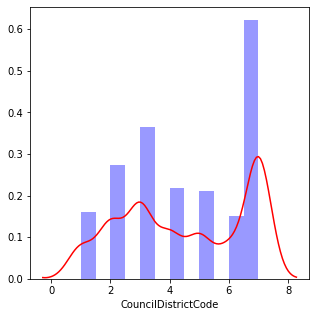

Variable : Neighborhood
['DOWNTOWN' 'EAST' 'MAGNOLIA / QUEEN ANNE' 'DELRIDGE' 'LAKE UNION'
 'GREATER DUWAMISH' 'NORTH' 'NORTHWEST' 'NORTHEAST' 'BALLARD' 'SOUTHEAST'
 'SOUTHWEST' 'CENTRAL' 'Central' 'Ballard' 'North' 'Delridge' 'Northwest']


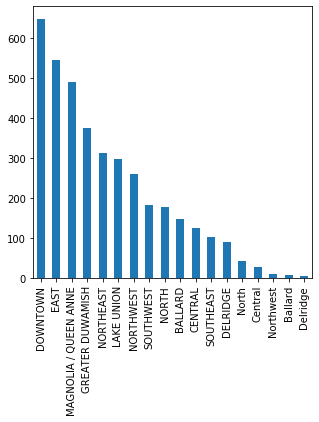

Variable : ZipCode
[98101. 98121. 98104. 98109. 98119. 98126. 98102. 98144. 98125. 98103.
 98134. 98122. 98115. 98107. 98133. 98177. 98105. 98118. 98199. 98117.
 98116. 98112. 98106. 98136. 98108. 98146. 98154. 98070. 98033. 98111.
 98191. 98164. 98181. 98168. 98155. 98006. 98124. 98053. 98012. 98013.
 98028. 98178. 98114. 98127. 98165. 98011. 98198. 98113. 98040. 98204.
 98020. 98272. 98145.]


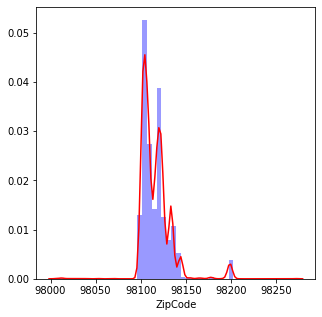

In [113]:
for col in geo[:-2] :
    print(f"Variable : {col}")
    print(df[col].unique())
    
    if str(df[col].dtype) == "float64" or str(df[col].dtype) == "int64" :
        fig = plt.figure(figsize = (5,5))
        sns.distplot(df[col], 
                     kde_kws={"color": "r"}, 
                     hist_kws={'color':"b"})
        plt.show()
    else :
        fig = plt.figure(figsize = (5,5))
        df[col].value_counts().plot.bar()
        plt.show()

Nous disposons de trois variables catégorielles nous renseignant, avec une précision croissante, sur la localisation géographique des observations dans Seattle. D'abord, corrigeons **Neighborhood** en passant totes les catégories en majuscules.

In [88]:
def to_maj(s):
    return s.upper()

df["Neighborhood"] = df["Neighborhood"].map(to_maj)

Nous disposons également, avec les variables **Latitude** et **Longitude**, que nous allons regrouper dans une variables **Coord**, de l'emplacement de chaque propriété.

In [89]:
df['Coord'] = list(zip(df.Latitude, df.Longitude))
df = df.drop(["Latitude", "Longitude"], axis = 1)

In [90]:
geo = ["CouncilDistrictCode", "Neighborhood", "ZipCode", "Coord"]

Nous ne voyons pas comment, à l'échelle d'une ville, la localisation géographique pourrait être un facteur notable dans la consomation des bâtiments. Nous sommes persuadés que nous n'avons assurément pas besoin de quatre variables géographique. Mais nous gardons ces variables au cas où en fait la localisation joue, afin de prendre la plus pertinente de celles dont nous disposons.

## Bloc **CATE**

In [91]:
cate = ["BuildingType", "PrimaryPropertyType", "ListOfAllPropertyUseTypes", 
        "LargestPropertyUseType", "SecondLargestPropertyUseType", "ThirdLargestPropertyUseType", 
        "ComplianceStatus", "YearBuilt"]

Nous voici avec notre bloc de variables catégorielles définissant les types et les usages des bâtiments/propriétés, ainsi que

In [92]:
for col in cate :
    print(f"Variable : {col}")
    print(f"Nombre de catégories uniques : {df[col].unique().shape[0]}")

Variable : BuildingType
Nombre de catégories uniques : 7
Variable : PrimaryPropertyType
Nombre de catégories uniques : 27
Variable : ListOfAllPropertyUseTypes
Nombre de catégories uniques : 460
Variable : LargestPropertyUseType
Nombre de catégories uniques : 57
Variable : SecondLargestPropertyUseType
Nombre de catégories uniques : 51
Variable : ThirdLargestPropertyUseType
Nombre de catégories uniques : 43
Variable : ComplianceStatus
Nombre de catégories uniques : 5
Variable : YearBuilt
Nombre de catégories uniques : 113


Variable : BuildingType
Nombre de catégories uniques : 7
['NonResidential' 'Multifamily LR (1-4)' 'Nonresidential COS' 'Campus'
 'Multifamily HR (10+)' 'Multifamily MR (5-9)' 'SPS-District K-12']


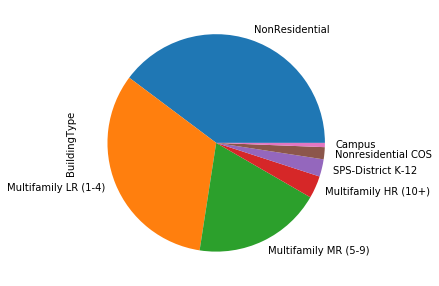

Variable : PrimaryPropertyType
Nombre de catégories uniques : 27

****** Le nombre de variable est trop important ******
****** Affichage des données pour les 20 premières valeurs au lieu de 27 ******

['Hotel' 'Low-Rise Multifamily' 'Mixed Use Property'
 'Small- and Mid-Sized Office' 'Other' 'Large Office' 'Retail Store'
 'Hospital' 'Supermarket/Grocery Store' 'Non-Refrigerated Warehouse'
 'Medical Office' 'High-Rise Multifamily' 'Mid-Rise Multifamily'
 'Senior Care Community' 'Residence Hall/Dormitory' 'K-12 School'
 'Worship Facility' 'Restaurant\n' 'University' 'Self-Storage Facility']


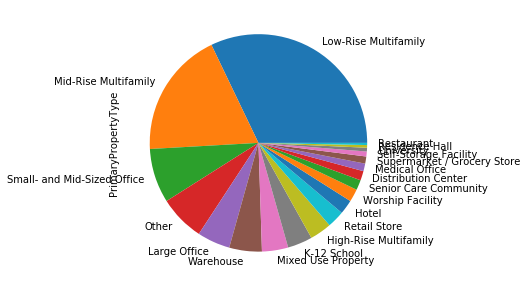

Variable : ListOfAllPropertyUseTypes
Nombre de catégories uniques : 460

****** Le nombre de variable est trop important ******
****** Affichage des données pour les 20 premières valeurs au lieu de 460 ******

['Hotel, Parking, Swimming Pool' nan 'Multifamily Housing, Retail Store'
 'Data Center, Medical Office, Non-Refrigerated Warehouse, Office, Other, Parking'
 'Data Center, Distribution Center, Office, Parking, Retail Store'
 'Hotel, Parking' 'Museum'
 'Financial Office, Multifamily Housing, Parking, Retail Store, Supermarket/Grocery Store'
 'Multifamily Housing' 'Office, Parking' 'Office, Other, Parking'
 'Laboratory, Office, Parking' 'Office' 'Hotel'
 'Movie Theater, Other - Restaurant/Bar, Parking'
 'Data Center, Office, Other, Parking, Restaurant' 'Other, Parking'
 'Hospital (General Medical & Surgical)'
 'Parking, Retail Store, Supermarket/Grocery Store'
 'Parking, Supermarket/Grocery Store']


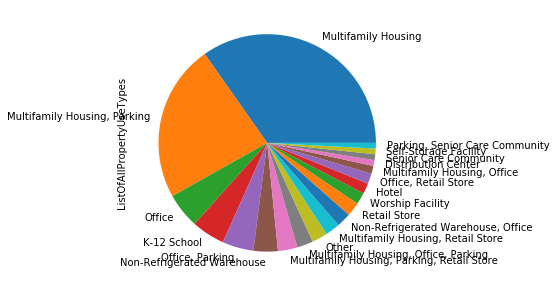

Variable : LargestPropertyUseType
Nombre de catégories uniques : 57

****** Le nombre de variable est trop important ******
****** Affichage des données pour les 20 premières valeurs au lieu de 57 ******

['Hotel' nan 'Multifamily Housing' 'Medical Office' 'Office' 'Museum'
 'Laboratory' 'Parking' 'Other' 'Hospital (General Medical & Surgical)'
 'Retail Store' 'Supermarket/Grocery Store' 'Senior Care Community'
 'Residence Hall/Dormitory' 'Non-Refrigerated Warehouse' 'K-12 School'
 'Restaurant' 'Outpatient Rehabilitation/Physical Therapy'
 'Automobile Dealership' 'Other - Recreation']


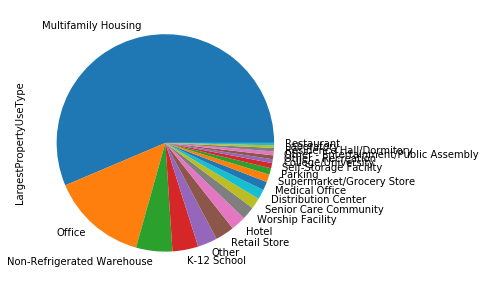

Variable : SecondLargestPropertyUseType
Nombre de catégories uniques : 51

****** Le nombre de variable est trop important ******
****** Affichage des données pour les 20 premières valeurs au lieu de 51 ******

['Parking' nan 'Retail Store' 'Data Center' 'Supermarket/Grocery Store'
 'Movie Theater' 'Laboratory' 'Office' 'Other' 'Bank Branch'
 'Medical Office' 'K-12 School' 'Restaurant' 'Financial Office'
 'Multifamily Housing' 'Fitness Center/Health Club/Gym'
 'Senior Care Community' 'Hospital (General Medical & Surgical)' 'Hotel'
 'Other - Public Services']


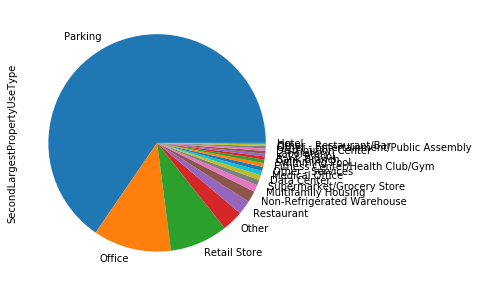

Variable : ThirdLargestPropertyUseType
Nombre de catégories uniques : 43

****** Le nombre de variable est trop important ******
****** Affichage des données pour les 20 premières valeurs au lieu de 43 ******

['Swimming Pool' nan 'Office' 'Distribution Center' 'Parking' 'Other'
 'Other - Restaurant/Bar' 'Laboratory' 'Financial Office' 'Retail Store'
 'Restaurant' 'Personal Services (Health/Beauty, Dry Cleaning, etc)'
 'Non-Refrigerated Warehouse' 'Multifamily Housing' 'Social/Meeting Hall'
 'Worship Facility' 'Food Service' 'Bank Branch' 'Fast Food Restaurant'
 'Fitness Center/Health Club/Gym']


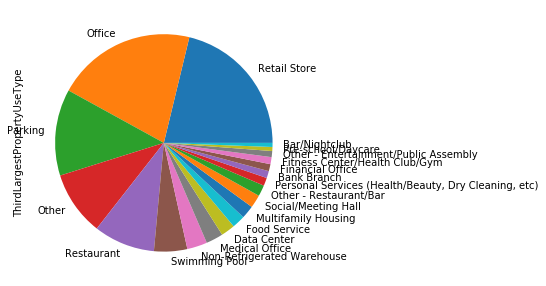

Variable : ComplianceStatus
Nombre de catégories uniques : 5
['Compliant' 'Not Compliant' 'Error - Correct Default Data' 'Missing Data'
 'Non-Compliant']


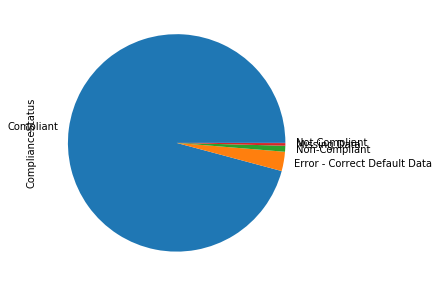

Variable : YearBuilt
Nombre de catégories uniques : 113

****** Le nombre de variable est trop important ******
****** Affichage des données pour les 20 premières valeurs au lieu de 113 ******

[1969 1980 1922 1900 1983 1986 2002 1910 2007 1968 1981 1989 1990 1906
 1973 1996 1947 1962 1997 2000]


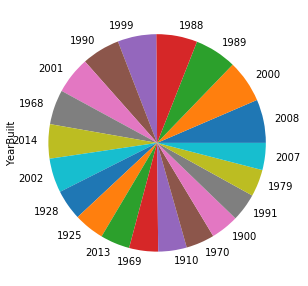

In [44]:
for col in cate :
    print(f"Variable : {col}")
    print(f"Nombre de catégories uniques : {df[col].unique().shape[0]}")
    
    if df[col].unique().shape[0] < 20 :
        print(df[col].unique())
        fig = plt.figure(figsize = (5,5))
        df[col].value_counts().plot.pie()
        plt.show()
    
    else :
        print()
        print("****** Le nombre de variable est trop important ******")
        print(f"****** Affichage des données pour les 20 premières valeurs au lieu de {df[col].unique().shape[0]} ******")
        print()
        print(df[col].unique()[:20])
        fig = plt.figure(figsize = (5,5))
        df[col].value_counts()[:20].plot.pie()
        plt.show()        

**Remarque générale**<br>On remarque que si une variable comme **BuildingType** contient un nombre assez faible de catégories, les autres en contiennent beaucoup plus, parfois jusqu'à plusieurs centaines. De plus, même si on n'a affiché que des représentations des 20 plus grandes valeurs de ces variables, on voit bien que la population, et donc la **représentativité**, de ces valeurs **décroit très vite**. Il nous faudra très probablement tenir compte de cela et faire en sorte que ces variables catégorielles ne soient pas un **facteur excessif** de **bruit** pour nos modèles.

### Cas de **ListOfAllPropertyUseTypes**

In [219]:
df[["ListOfAllPropertyUseTypes", "LargestPropertyUseType", "SecondLargestPropertyUseType", 
    "ThirdLargestPropertyUseType"]].head(5)

,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
0,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool
1,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool
2,NaN,NaN,NaN,NaN
3,"Multifamily Housing, Retail Store",Multifamily Housing,Retail Store,NaN
4,"Data Center, Medical Office, Non-Refrigerated ...",Medical Office,Parking,Office


Lors de nos observations, il nous a semblé que très souvent, et comme son nom peut le laisser penser, **ListOfAllPropertyUseTypes** était la concaténation des variables **LargestPropertyUseType**, **SecondLargestPropertyUseType** et **ThirdLargestPropertyUseType**.<br>Nous allons le vérifier et créant une variable **Words** qui sera l'addition des trois dernièrs variables évoquées, et en la comparant avec la première.

In [93]:
# création de "words"
df["words"] = ""
df["words"][df["ThirdLargestPropertyUseType"].notnull()] = df["LargestPropertyUseType"].astype('str')\
            + ", " + df["SecondLargestPropertyUseType"].astype('str')\
            + ", " + df["ThirdLargestPropertyUseType"].astype('str')

df["words"][df["ThirdLargestPropertyUseType"].isnull() & df["SecondLargestPropertyUseType"].notnull()] = df["LargestPropertyUseType"].astype('str')\
            + ", " + df["SecondLargestPropertyUseType"].astype('str')

df["words"][df["ThirdLargestPropertyUseType"].isnull() & df["SecondLargestPropertyUseType"].isnull() & df["LargestPropertyUseType"].notnull()] = df["LargestPropertyUseType"].astype('str')

In [94]:
df["ListOfAllPropertyUseTypes"] = df["ListOfAllPropertyUseTypes"].fillna("")

# création d'une variable booléenne suite à la comparaison
df['table'] = np.where(df["ListOfAllPropertyUseTypes"] == df["words"], True, False)

# analyse des résultats
df['table'].value_counts()

True     3107
False     731
Name: table, dtype: int64

Comme nous le pensions, la relation existe bien. Ceci dit, la comparaison renvoie aussi à suffisament de différence pour qu'on ne puisse pas simplement éliminer **ListOfAllPropertyUseTypes** sans risquer de perdre de l'information importante.<br>Au cours d'une démarche dont nous vous épargnons les détails, nous avons créé une nouvelle variable à partir des catégories se trouvant uniquement chez elle, variable dont la répartition était celle-ci...<br>
<img src = "Data/fig01.png"><br>

Ce qui la rendait en l'état assez peu utilisable.<br>Du coup, nous allons nous contenter, au cas où, de garder une variable catégorielle **OtherPropertyUse**, valant 1 ou 0, informant si une utilisation notable d'une propriété n'était indiquée que dans **ListOfAllPropertyUseTypes**.

In [95]:
df['OtherPropertyUse'] = np.where(df["ListOfAllPropertyUseTypes"] == df["words"], 0, 1)

Avant de nous séparer de **ListOfAllPropertyUseTypes**, nous allons l'utiliser afin de compléter une poignée de valeurs manquantes.

In [96]:
df['ListOfAllPropertyUseTypes'] = df['ListOfAllPropertyUseTypes'].replace("", np.nan)

liste_val = df[df['LargestPropertyUseType'].isnull() & df['ListOfAllPropertyUseTypes'].notnull()]['ListOfAllPropertyUseTypes'].values.tolist()

li_liste = []

for s in liste_val :
    l = s.split(", ")
    li_liste.append(l)
    
li_liste[1] = ['Fitness Center/Health Club/Gym', 'Office', 'Other']

liste_index = df[df['LargestPropertyUseType'].isnull() & df['ListOfAllPropertyUseTypes'].notnull()]['ListOfAllPropertyUseTypes'].index.values.tolist()
    
# complétion des données manquantes

col = ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']

for ind, mots in zip(liste_index, li_liste) :
    
    for i in range(len(mots)) :
        df.loc[ind, col[i] ] = mots[i]

Maintenant, nous allons remplir les derniers **LargestPropertyUseType** manquants (cette variable doit être renseignée car une propriété doit obligatoirement avoir au moins une fonction) en utilisant la valeur la plus fréquente de **LargestPropertyUseType** pour une valeur donnée de **PrimaryPropertyType**.

In [97]:
for i, elt in zip(df[df['LargestPropertyUseType'].isnull()]["PrimaryPropertyType"].index, df[df['LargestPropertyUseType'].isnull()]["PrimaryPropertyType"].to_list()):
    df.loc[df['LargestPropertyUseType'].isnull().index[i], "LargestPropertyUseType"] = df[df["PrimaryPropertyType"] == elt]["LargestPropertyUseType"].value_counts().index[0]

Elimination des colonnes désormais inutiles

In [98]:
df = df.drop(["ListOfAllPropertyUseTypes", "words", "table"], axis = 1)

### Correction de **Compliance Status**

In [202]:
df.ComplianceStatus.value_counts()

Compliant                       3678
Error - Correct Default Data     110
Non-Compliant                     34
Missing Data                      15
Not Compliant                      1
Name: ComplianceStatus, dtype: int64

Cette variable appelle quelques corrections.

In [99]:
dic_compliance = {"Compliant" : "Compliant", 
                  "Error - Correct Default Data" : "Missing Data", 
                  "Non-Compliant" : "Non-Compliant", 
                  "Missing Data" : "Missing Data", 
                  "Not Compliant" : "Non-Compliant"}

df["ComplianceStatus"] = df["ComplianceStatus"].map(dic_compliance)

### Variable **YearBuilt**

In [204]:
df.YearBuilt.unique().shape[0]

113

**YearBuilt** nous renseigne sur l'année de construction ou de dernière rénovation d'une propriété. Il s'agit d'une variable catégorielle contenant **113** valeurs.<br>Nous créons par avance une nouvelle variable **DecadeBuilt** qui nous sera peut-être utile dans le but de diminuer la complexité de nos modèles à venir.

In [100]:
df["DecadeBuilt"] = (df["YearBuilt"] // 10)*10

In [101]:
cate = ["BuildingType", "PrimaryPropertyType", "LargestPropertyUseType", "SecondLargestPropertyUseType", 
        "ThirdLargestPropertyUseType", "OtherPropertyUse", "ComplianceStatus", "YearBuilt", "DecadeBuilt"]

Pour en terminer avec ce bloc de variable, opérons une correction après avoir aperçu des erreurs, notamment dans **PrimaryPropertyType**.

In [242]:
df.PrimaryPropertyType.unique()

array(['Hotel', 'Low-Rise Multifamily', 'Mixed Use Property',
       'Small- and Mid-Sized Office', 'Other', 'Large Office',
       'Retail Store', 'Hospital', 'Supermarket/Grocery Store',
       'Non-Refrigerated Warehouse', 'Medical Office',
       'High-Rise Multifamily', 'Mid-Rise Multifamily',
       'Senior Care Community', 'Residence Hall/Dormitory', 'K-12 School',
       'Worship Facility', 'Restaurant', 'University',
       'Self-Storage Facility', 'Warehouse', 'Residence Hall',
       'Distribution Center', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse'], dtype=object)

In [102]:
def corrige(s):
    
    if type(s) != float  :
        return s.strip("\n")


df["PrimaryPropertyType"] = df["PrimaryPropertyType"].map(corrige)

Enfin, nous remplissons nos valeurs manquantes par **No Data**.

In [103]:
df[cate] = df[cate].fillna("No Data")

In [104]:
df.to_csv("Data/df_clean3.csv", index = False)

In [108]:
df = pd.read_csv("Data/df_clean3.csv")

## Bloc **QUANT**

In [109]:
quant = ["NumberofBuildings", "NumberofFloors", "PropertyGFATotal", "PropertyGFAParking", 
         "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA", "SecondLargestPropertyUseTypeGFA", 
         "ThirdLargestPropertyUseTypeGFA"]

Ce bloc de variables quantitatives contient deux variables décrivant les nombres de bâtiments et d'étages des propriétés ainsi qu'un groupe de différentes superficies (Sup. totale, sup. "couverte", sup. occupée par les différentes utilisations des propriétés, etc.)

### **NumberofBuildings** & **NumberofFloors**

NumberofBuildings ---------------------------

count    3831.000000
mean        1.066301
std         0.872432
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        27.000000
Name: NumberofBuildings, dtype: float64



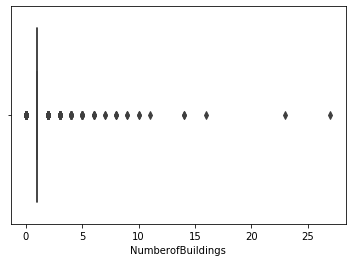

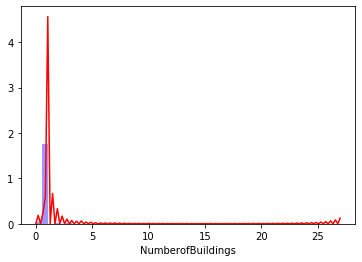


NumberofFloors ---------------------------

count    3838.000000
mean        4.817092
std         5.440454
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        99.000000
Name: NumberofFloors, dtype: float64



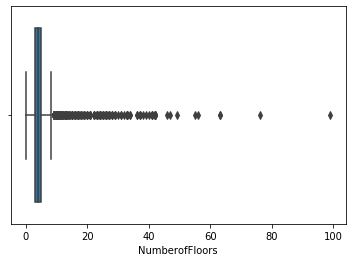

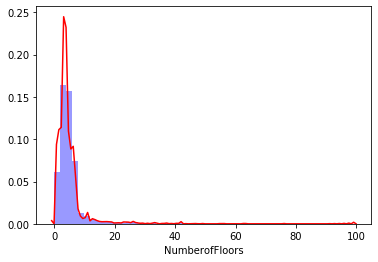

In [120]:
for col in ["NumberofBuildings", "NumberofFloors"] :
    print(col + " ---------------------------")
    print()
    print(df[col].describe())
    print()
    sns.boxplot(df[col])
    plt.show()
    sns.distplot(df[col], kde_kws={"color": "r"}, hist_kws={'color':"b"})
    plt.show()
    print()

Les données et graphs ci-dessus font ressortir la présence d'outliers. Sauf qu'après plusieurs vérifications en réutilisant le dataset joint original, nous sommes en mesure de considérer ces propriétés, aux nombres de bâtiments ou d'étages élevés, comme légitimes. Il s'agit juste en général de tours ou d'établissements comme des universités, etc...

In [64]:
df_raw = pd.read_csv("Data/df_raw.csv")
df_raw[["PrimaryPropertyType", "PropertyName", "NumberofFloors", "Address"]][df_raw["NumberofFloors"] > 50]

,PrimaryPropertyType,PropertyName,NumberofFloors,Address
235,Large Office,SEATTLE MUNICIPAL TOWER,63.0,NaN
271,Large Office,WASH MUTUAL TOWER (1201 THIRD AVE),55.0,NaN
293,Large Office,TWO UNION SQUARE,56.0,NaN
581,Large Office,COLUMBIA CENTER,76.0,NaN
1371,Worship Facility,CHINESE BAPTIST CHURCH,99.0,NaN
3572,Large Office,Seattle Municipal Tower (2030),63.0,700 Fifth Avenue
3608,Large Office,1201 Third Avenue,55.0,1201 3rd ave
3629,Large Office,Two Union Square,56.0,601 Union St.
3895,Large Office,Columbia Center - 2015,76.0,701 5th Avenue
4691,Worship Facility,Seattle Chinese Baptist Church,99.0,5801 Beacon Avenue South


Voici par exemple la **Seattle Municipal Tower**:

<img src="Data/seattle_muni_tower.jpg">

Nous avons cependant détecté une erreur, car la **Seattle Chinese Baptist Church** se trouvant au **5801 Beacon Avenue South**, que voici :

<img src = "Data/chi_church.png"><br>

...ne fait à coup sûr pas **99** étages, mais plutôt 3 ou **4**...

In [110]:
df.loc[df["NumberofFloors"] == 99, "NumberofFloors"] = 4

On va maintenant corriger les propriétés dont le nombre de bâtiment n'est pas renseigné.

In [66]:
df[df["NumberofBuildings"].isnull()]

,CouncilDistrictCode,Neighborhood,ZipCode,BuildingType,PrimaryPropertyType,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,ComplianceStatus,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Coord,OtherPropertyUse,DecadeBuilt
1128,7,DOWNTOWN,98104.0,NonResidential,Small- and Mid-Sized Office,NaN,NaN,NaN,Non-Compliant,NaN,NaN,4.0,63150,0,63150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"(47.6038, -122.33293)",NaN,NaN
1307,4,NORTHEAST,98115.0,Multifamily LR (1-4),Low-Rise Multifamily,NaN,NaN,NaN,Non-Compliant,NaN,NaN,3.0,33166,0,33166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(47.681490000000004, -122.26471000000001)",NaN,NaN
2313,1,SOUTHWEST,98136.0,Multifamily LR (1-4),Low-Rise Multifamily,NaN,NaN,NaN,Compliant,NaN,NaN,4.0,29357,0,29357,NaN,NaN,NaN,NaN,19.200001,20.200001,NaN,NaN,5.636832e+05,593798.625,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"(47.547309999999996, -122.38656)",NaN,NaN
2863,4,NORTHEAST,98105.0,Multifamily LR (1-4),Low-Rise Multifamily,NaN,NaN,NaN,Compliant,NaN,NaN,4.0,28472,0,28472,NaN,NaN,NaN,NaN,27.100000,28.000000,NaN,NaN,7.702755e+05,797507.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"(47.67025, -122.31232)",NaN,NaN
3016,6,NORTHWEST,98103.0,Multifamily LR (1-4),Low-Rise Multifamily,NaN,NaN,NaN,Non-Compliant,NaN,NaN,4.0,29562,8531,21031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"(47.69658, -122.34342)",NaN,NaN
3022,1,SOUTHWEST,98116.0,Multifamily LR (1-4),Low-Rise Multifamily,NaN,NaN,NaN,Compliant,NaN,NaN,3.0,30420,0,30420,NaN,NaN,NaN,NaN,34.500000,37.000000,NaN,NaN,1.049639e+06,1126781.750,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"(47.58968, -122.38587)",NaN,NaN
3212,4,NORTHEAST,98105.0,NonResidential,Mixed Use Property,NaN,NaN,NaN,Non-Compliant,NaN,NaN,2.0,20760,0,20760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"(47.66182, -122.31345)",NaN,NaN


En nous basant sur les trois valeurs ci-dessous...

In [67]:
df["NumberofBuildings"][df["BuildingType"] == "Multifamily LR (1-4)"].mean()

1.0518341307814991

In [68]:
df["NumberofBuildings"][(df["BuildingType"] == "NonResidential") & (df["PrimaryPropertyType"] == "Small- and Mid-Sized Office")].mean()

0.9833887043189369

In [69]:
df["NumberofBuildings"][(df["BuildingType"] == "NonResidential") & (df["PrimaryPropertyType"] == "Mixed Use Property")].mean()

1.0091743119266054

...nous décidons de peupler ces données manquantes par la valeur **1**.

In [111]:
df.loc[df["NumberofBuildings"].isnull(), "NumberofBuildings"] = 1

### Variables **GFA**

PropertyGFATotal ---------------------------

count    3.838000e+03
mean     9.348876e+04
std      1.498970e+05
min      1.630000e+04
25%      2.939250e+04
50%      4.529550e+04
75%      9.395075e+04
max      2.200000e+06
Name: PropertyGFATotal, dtype: float64



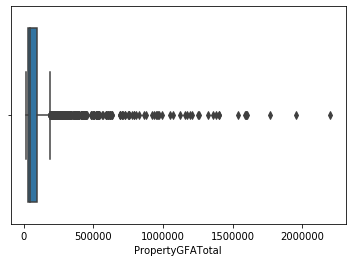


PropertyGFAParking ---------------------------

count      3838.000000
mean      10451.197238
std       34078.383489
min          -3.000000
25%           0.000000
50%           0.000000
75%        1410.000000
max      512608.000000
Name: PropertyGFAParking, dtype: float64



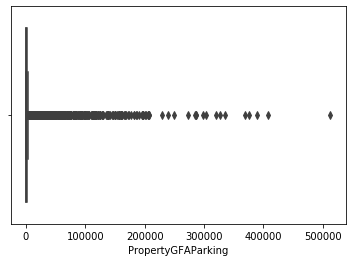


PropertyGFABuilding(s) ---------------------------

count    3.838000e+03
mean     8.303756e+04
std      1.316030e+05
min     -5.055000e+04
25%      2.768075e+04
50%      4.319150e+04
75%      8.414475e+04
max      2.200000e+06
Name: PropertyGFABuilding(s), dtype: float64



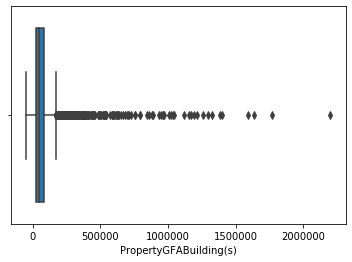


LargestPropertyUseTypeGFA ---------------------------

count    3.790000e+03
mean     7.662387e+04
std      1.227771e+05
min      5.656000e+03
25%      2.546300e+04
50%      4.026850e+04
75%      7.776300e+04
max      1.719643e+06
Name: LargestPropertyUseTypeGFA, dtype: float64



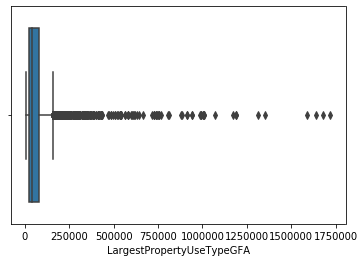


SecondLargestPropertyUseTypeGFA ---------------------------

count      2015.000000
mean      27753.091462
std       50173.988139
min           0.000000
25%        5083.500000
50%       11111.000000
75%       27757.000000
max      686750.000000
Name: SecondLargestPropertyUseTypeGFA, dtype: float64



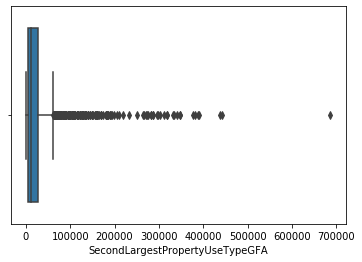


ThirdLargestPropertyUseTypeGFA ---------------------------

count       717.000000
mean      11159.574893
std       24039.744556
min           0.000000
25%        2377.000000
50%        5149.000000
75%       10270.000000
max      303910.000000
Name: ThirdLargestPropertyUseTypeGFA, dtype: float64



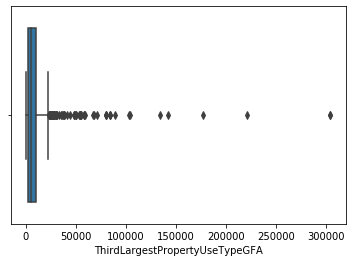

In [123]:
for col in quant[2:] :
    print(col + " ---------------------------")
    print()
    print(df[col].describe())
    print()
    sns.boxplot(df[col])
    plt.show()
    print()

Ici encore, nos données indiquent la présence d'outliers, mais comme les grandes superficies concernent des propriétés de type **campus**, **universités**, **complexes de bureaux** (...), nous les considérons comme légitimes.

Nous avons juste quelques superficies **négatives** à corriger.

In [164]:
df[df["PropertyGFAParking"] < 0]

,CouncilDistrictCode,Neighborhood,ZipCode,BuildingType,PrimaryPropertyType,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,ComplianceStatus,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Coord,OtherPropertyUse,DecadeBuilt
350,2,SOUTHEAST,98118.0,Multifamily MR (5-9),Mid-Rise Multifamily,Multifamily Housing,NaN,NaN,Compliant,NaN,1.0,5.0,20967,-3,20970,20967.0,NaN,NaN,81.0,25.7,27.5,80.8,86.4,539271.0,576638.0,0.0,158051.0,539293.0,0.0,0.0,0.0,3.76,0.07,"(47.52056437, -122.26026029999998)",NaN,NaN
489,2,DOWNTOWN,98104.0,NonResidential,Small- and Mid-Sized Office,Office,Bank Branch,NaN,Compliant,NaN,1.0,11.0,68452,-2,68454,61665.0,6787.0,NaN,81.0,53.6,58.3,168.4,182.9,3670298.0,3988260.0,0.0,1075703.0,3670451.0,0.0,0.0,0.0,25.59,0.14,"(47.59725206, -122.3277466)",NaN,NaN


Ici nous allons remplacer ces valeurs négatives par **0**.

In [112]:
df.loc[df.index == 350, "PropertyGFAParking"] = 0
df.loc[df.index == 489, "PropertyGFAParking"] = 0

In [165]:
df[df["PropertyGFABuilding(s)"] < 0]

,CouncilDistrictCode,Neighborhood,ZipCode,BuildingType,PrimaryPropertyType,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,ComplianceStatus,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Coord,OtherPropertyUse,DecadeBuilt
490,7,MAGNOLIA / QUEEN ANNE,98119.0,NonResidential,Small- and Mid-Sized Office,Office,NaN,NaN,Compliant,NaN,1.0,5.0,54015,97325,-43310,54015.0,NaN,NaN,65.0,64.0,64.0,200.9,200.9,3455247.0,3455247.0,0.0,1012675.0,3455391.0,0.0,0.0,0.0,24.09,0.17,"(47.62496806, -122.359705)",NaN,NaN
547,4,NORTHEAST,98105.0,NonResidential,Other,Parking,Automobile Dealership,NaN,Compliant,NaN,1.0,3.0,33648,84198,-50550,83600.0,39000.0,NaN,NaN,35.6,35.6,111.9,111.9,1389553.0,1389553.0,0.0,407255.0,1389610.0,0.0,0.0,0.0,9.69,0.11,"(47.66411096, -122.3166394)",NaN,NaN


Ici, il nous semble que les colonnes **PropertyGFATotal** et **PropertyGFAParking** ont été **interverties**. On va corriger cela "à la main".

In [113]:
df.loc[df.index == 490, "PropertyGFATotal"] = 97325
df.loc[df.index == 490, "PropertyGFAParking"] = 54015
df.loc[df.index == 490, "PropertyGFABuilding(s)"] = 43310

df.loc[df.index == 547, "PropertyGFATotal"] = 84198
df.loc[df.index == 547, "PropertyGFAParking"] = 33648
df.loc[df.index == 547, "PropertyGFABuilding(s)"] = 50550

### Création de **nouvelles variables**

**PropertyBuildingGFARate**

Comme nous le montre le graph suivant, la surface **totale** d'une propriété est égale à l'**addition** de ses surface **découvertes** et **couvertes**.

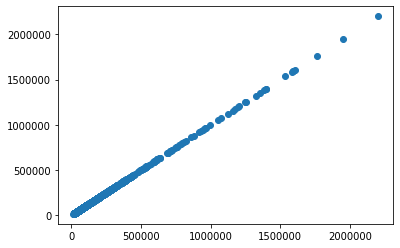

In [267]:
plt.scatter(df['PropertyGFATotal'], (df['PropertyGFAParking'] + df["PropertyGFABuilding(s)"]))

On crée une variable **PropertyBuildingGFARate**, **fraction** de la surface **couverte** sur la surface **totale** d'une propriété.

In [114]:
df["PropertyBuildingGFARate"] = df["PropertyGFABuilding(s)"] / df['PropertyGFATotal']

Cela nous permet d'éliminer deux variables.

In [115]:
df = df.drop(["PropertyGFABuilding(s)", "PropertyGFAParking"], axis=1)

**LargestPropertyUseTypeGFA**

In [116]:
liste = ["LargestPropertyUseTypeGFA", "SecondLargestPropertyUseTypeGFA", 
         "ThirdLargestPropertyUseTypeGFA"]

A partir des trois variables de la liste ci-dessus, nous allons créer trois **ratio** en fonction de **PropertyGFATotal** (après avoir rempli les valeurs NaN de **0**).

In [117]:
for col in liste :
    df[liste] = df[liste].fillna(value = 0)

df["L_PUTGFA"] = df["LargestPropertyUseTypeGFA"] / df["PropertyGFATotal"]
df["S_PUTGFA"] = df["SecondLargestPropertyUseTypeGFA"] / df["PropertyGFATotal"]
df["T_PUTGFA"] = df["ThirdLargestPropertyUseTypeGFA"] / df["PropertyGFATotal"]

df = df.drop(liste, axis = 1)

In [120]:
quant = ["NumberofBuildings", "NumberofFloors", "PropertyGFATotal", "PropertyBuildingGFARate", 
         "L_PUTGFA", "S_PUTGFA", "T_PUTGFA"]

## Bloc **TARGETS**

In [121]:
targets = ["ENERGYSTARScore", "SiteEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)", "SourceEUI(kBtu/sf)", 
           "SourceEUIWN(kBtu/sf)", "SiteEnergyUse(kBtu)", "SiteEnergyUseWN(kBtu)", "SteamUse(kBtu)", 
           "Electricity(kWh)", "Electricity(kBtu)", "NaturalGas(therms)", "NaturalGas(kBtu)", 
           "OtherFuelUse(kBtu)", "GHGEmissions(MetricTonsCO2e)", 
           "GHGEmissionsIntensity(kgCO2e/ft2)"]

De ces variables, nous ne garderons que nos deux cibles, **SiteEnergyUse(kBtu)**, **GHGEmissions(MetricTonsCO2e)**, ainsi que la variable **ENERGYSTARScore** que nous aurons à discuter.

Notre objectif étant de modéliser les consommations énergétiques et les émissions de gaz à effet de serre de nos propriétés, les seules choses que nous pouvons tirer de ce bloc sont des **variales binaires** nous disant si une propriété utilise **certains types d'énergie** (fuel/charbon, gaz naturel ou autre...).

In [122]:
df_e = df[["SteamUse(kBtu)", "NaturalGas(kBtu)", "OtherFuelUse(kBtu)"]]
df_e.describe()

,SteamUse(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu)
count,3.829000e+03,3.829000e+03,3.827000e+03
mean,2.361399e+05,1.273132e+06,6.214754e+03
std,3.441115e+06,4.471811e+06,1.831031e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.810480e+05,0.000000e+00
75%,0.000000e+00,1.166758e+06,0.000000e+00
max,1.349435e+08,1.381912e+08,8.269669e+06


In [123]:
energies = ["Steam", "NaturalGas", "Other"]

def use_energy(n):
    if n == 0 :
        return 0
    else :
        return 1

for energie in energies :    
    df[energie] = df_e[df_e.columns[energies.index(energie)]].map(use_energy)

In [124]:
targets = ["Steam", "NaturalGas", "Other", "ENERGYSTARScore", "SiteEnergyUseWN(kBtu)", 
           "GHGEmissions(MetricTonsCO2e)"]

### Reorganisation et sauvegarde du dataset

In [125]:
df = df[geo + cate + quant + targets]

In [127]:
df.to_csv("Data/df_clean4.csv", index = False)

In [130]:
df = pd.read_csv("Data/df_clean4.csv")

# Analyses Bivariées

Nous allons maintenant tenter de trouver d'éventuelles corrélations linéaires entre nos variables, en commençant par observer la **table de corrélation** de nos variables numériques.

Conversion de nos variables catégorielles en valeurs non-numériques

In [131]:
liste_var = ["CouncilDistrictCode", "ZipCode", "OtherPropertyUse", "YearBuilt", "DecadeBuilt", 
                  "Steam", "NaturalGas", "Other"]

for col in liste_var :
    df[col] = df[col].astype("str")

Extraction de la liste de nos variables numériques.

In [132]:
var_num = df.select_dtypes(exclude=["object"]).columns

Affichage de la **table de corrélation** à partir d'un script importé du module **marko**.

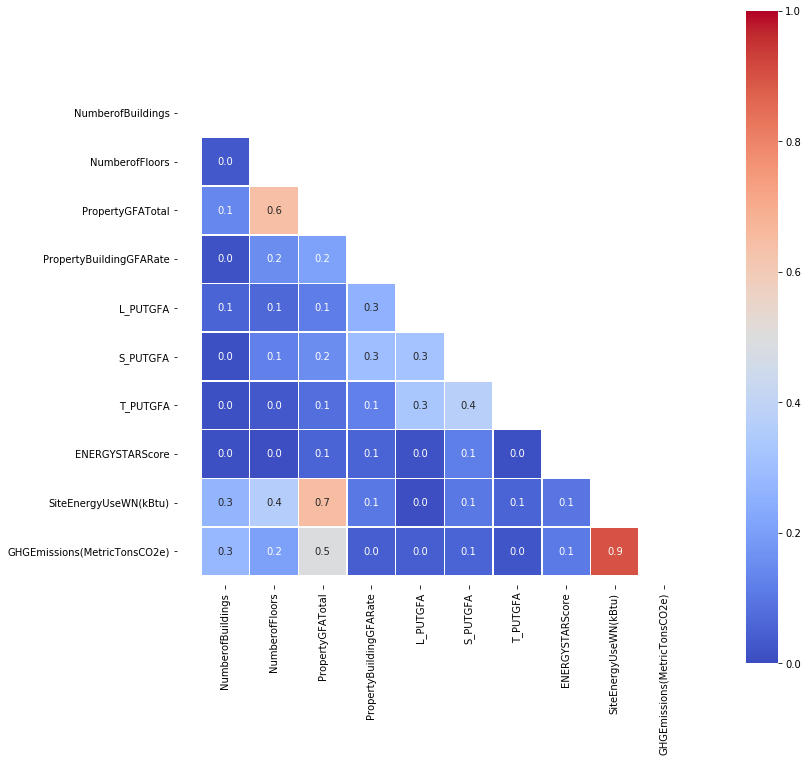

In [133]:
table_cor(df, var_num)

Nous avons quelques observations intéressantes :<br>- Concernant nos **cibles**, **SiteEnergyUseWN(kBtu)** et **GHGEmissions(MetricTonsCO2e)** semblent fortement corrélés.<br>- Parmi nos **variables quantitatives**, la superficie totale des propriétés, leur nombre d'étages et de bâtiments sont les facteurs les plus corrélés à la consommation d'énergie. 

Nous allons maintenant observer d'éventuelles corrélations entre nos **variables qualitatives** et **SiteEnergyUseWN(kBtu)**.

Extrayons nos **variables qualitatives** et générons un dataset de résultats des **anova**, entre ces variables et **SiteEnergyUseWN(kBtu)**, grâce à un script importé du module **marko**.

In [134]:
var_ob = df.select_dtypes(include=["object"]).columns

In [74]:
# utilisation de la fonction "anova_g"
res = anova_g(df, var_ob, "SiteEnergyUseWN(kBtu)")

In [75]:
# dataframe de résultats
res.head(7)

,vquant,vqual,R2,p-value
3,SiteEnergyUseWN(kBtu),Coord,0.9722997367871178,0.8390024710774467
6,SiteEnergyUseWN(kBtu),LargestPropertyUseType,0.38250438415211485,0.0
5,SiteEnergyUseWN(kBtu),PrimaryPropertyType,0.34957159058271375,0.0
8,SiteEnergyUseWN(kBtu),ThirdLargestPropertyUseType,0.2002082624509825,3.1104376795513185e-15
4,SiteEnergyUseWN(kBtu),BuildingType,0.09377758871978956,2.780653788586009e-78
2,SiteEnergyUseWN(kBtu),ZipCode,0.05332783353661119,1.3154629595462633e-20
13,SiteEnergyUseWN(kBtu),Steam,0.04964338817434808,2.6557751797391487e-44


**LargestPropertyUseType**, **PrimaryPropertyType** et **ThirdLargestPropertyUseType** semblent être nos variables les plus corréllées.

**Conclusion**

Nous allons conclure cette analyse par l'échantillonage **features / labels** de nos données, après les avoir réduites à des données cibles non-nulles.

In [145]:
df = df[df["SiteEnergyUseWN(kBtu)"].notnull() & df["GHGEmissions(MetricTonsCO2e)"].notnull()]

In [147]:
X = df.drop(["ENERGYSTARScore", "SiteEnergyUseWN(kBtu)", "GHGEmissions(MetricTonsCO2e)"], axis = 1)
y = df[["ENERGYSTARScore", "SiteEnergyUseWN(kBtu)", "GHGEmissions(MetricTonsCO2e)"]]

**Sauvegardes**

In [150]:
pickle_out = open("Data/X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

In [151]:
pickle_out = open("Data/y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

**Fin de la première partie**